# Activites List
- It is highly encouraged to work in a group of two students for the lab of this case study.
- <b>Important: for Activity 1, Activity 2 and  Activity 3 , please use the files [file1.csv](./Data/file1.csv), [file2.csv](./Data/file2.csv) and [file3.csv](./Data/file3.csv) from the [Data](./Data) folder.</b>

### Activity 1 (Monday)

- Aggregate data into one Data Frame using Pandas. Pay attention that files may have different names for the same column. therefore, make sure that you unify the columns names before concating them. 
- Standardizing header names
- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints ). Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.
- clean the number of open complaints and extract the middle number which is changing between records. pay attention that the number of open complaints is a categorical feature.
- Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- Removing duplicates

### Activity 2 (Tuesday)
- Replacing null values – Replace missing values with means of the column (for numerical columns). Pay attention that the Income feature for instance has 0s which is equivalent to null values. (We assume here that there is no such income with 0 as it refers to missing values)
Hint: numpy.nan is considered of float64 data type.
- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- (Optional) Standardizing the data – Use string functions to standardize the text data (lower case)

<b>Important: for Activity 3 and Activity 4 , please use the [file Data_Marketing_Customer_Analysis_Round3.csv](./Data/Data_Marketing_Customer_Analysis_Round3.csv) from the [Data](./Data) folder.</b>

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import pearsonr
from itertools import compress

pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

### Activity 3 (Wednesday)

- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively) [X]
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables [X]
  - Use Matplotlib to construct histograms [X]
  - Do the distributions for different numerical variables look like a normal distribution [X]
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.
- Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [3]:
df = pd.read_csv(r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\IH_RH_DA_FT_AUG_2022\Class_Materials\Case_Studies\Customer_Analysis_Case_Study\Data\Data_Marketing_Customer_Analysis_Round3.csv")

#### Extract `numerical` and `categorical` data from original dataframe

In [6]:
df_numerical = df.select_dtypes(exclude=['object'])
df_categorical = df.select_dtypes(include=['object'])

In [13]:
df_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [8]:
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


#### Create sns distribution plot for every numerical column

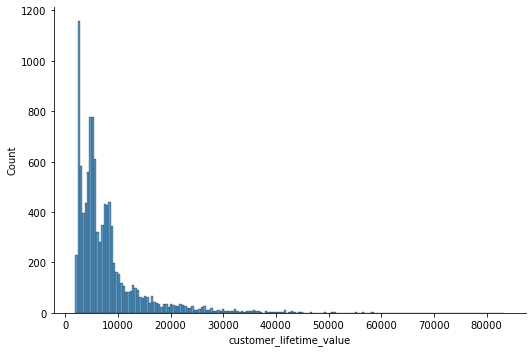

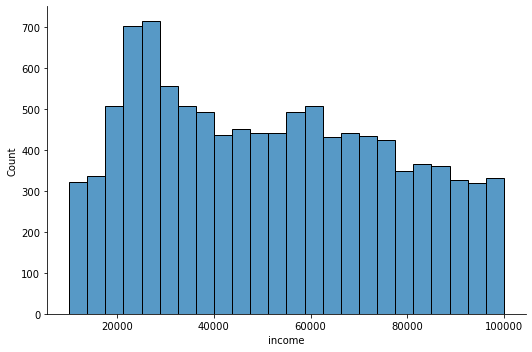

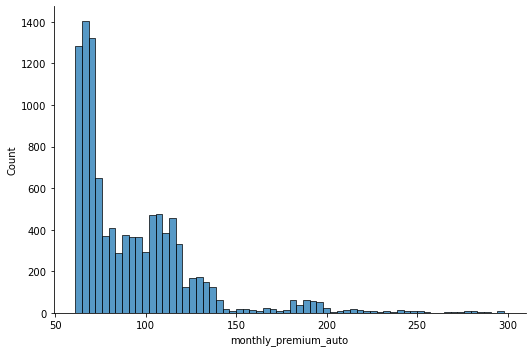

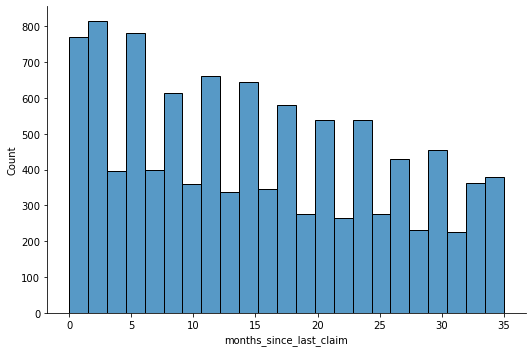

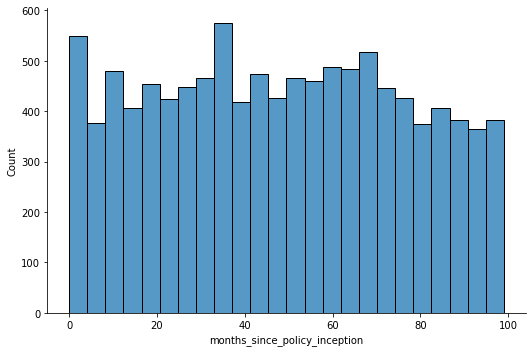

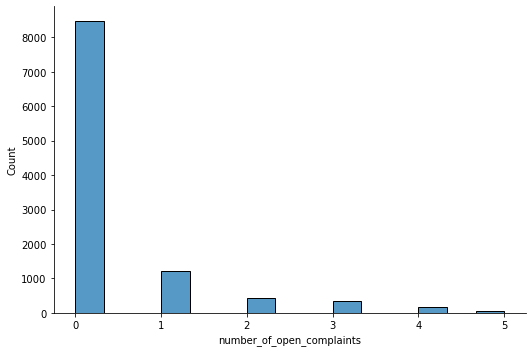

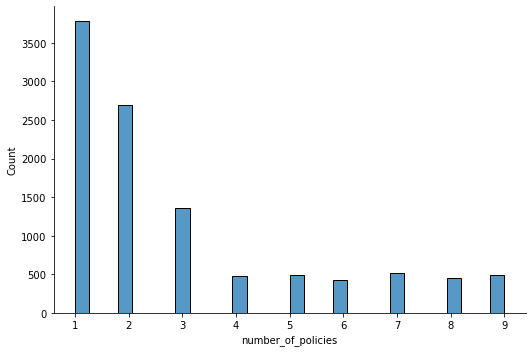

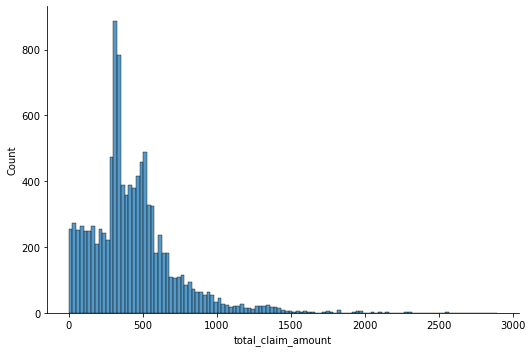

In [34]:
for col in df_numerical.columns:
    sns.displot((df_numerical[col]), height=5, aspect=1.5)

#### Histograms of numerical values 

*`df.hist()`*

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

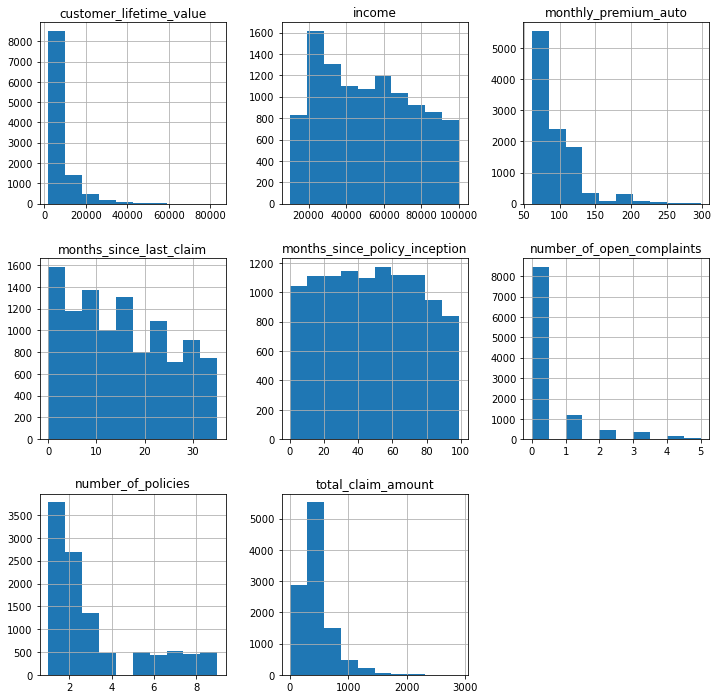

In [37]:
df_numerical.hist(figsize=(12,12))

*`matplotlib`*

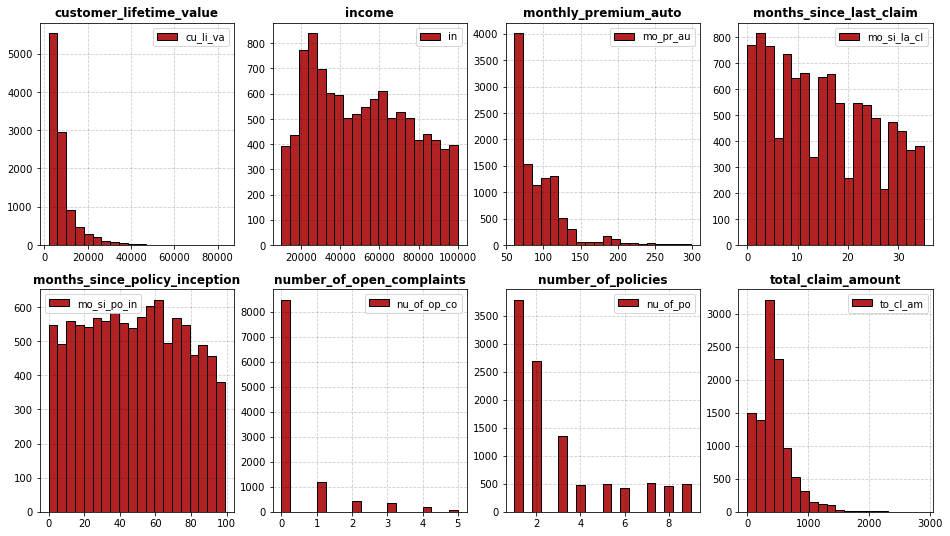

In [109]:
rows = 2
cols = 4
plot_coords = [(row,col) for row in range(rows) for col in range(cols)]

colnames_split = [col.split("_") for col in df_numerical.columns]
labels = []
for title in colnames_split:
    if len(title)>1:
        _name = ""
        for name in title:
            _name += name[:2] + "_"
        labels.append(_name)
    else:
        _name = title[0][:2]
        labels.append(_name)
labels = [label.rstrip("_") for label in labels]


fig, ax = plt.subplots(rows, cols,figsize = (16,9))

for p in range(rows*cols):
    # Customer Lifetime Value
    ax[plot_coords[p]].grid(color="k", alpha=0.2, ls="--")
    ax[plot_coords[p]].hist(df_numerical[df_numerical.columns[p]], bins=20, edgecolor='k', facecolor="firebrick",
                           label=labels[p])
    ax[plot_coords[p]].set_title(df_numerical.columns[p], weight="bold")
    ax[plot_coords[p]].legend(loc="best")

plt.show()

#### Do the distributions for different numerical variables look like a normal distribution

    - customer_lifetime_value --> looks like power law
    - income --> may be normal dist, but doesn't really look like it
    - montly_premium_auto --> looks like power law
    - months_since_last_claim --> looks somewhat linear
    - months_since_policy_inception --> may be normal dist, but doesn't really look like it
    - number_of_open_complaints --> looks like power law
    - number_of_policies --> maybe power law
    - total_claim_amount --> partly power law (after ~300); weird behaviour before that
    
***`Conclusion`***: No feature clearly shows normal distribution.

#### Checking multicollinearity

`Create correlation matrix to check if and how any features are correlated`

In [20]:
corr_matrix = df_numerical.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.00,0.40,0.01,0.02,-0.03,0.02,0.23
income,0.00,1.00,-0.00,-0.03,0.00,0.02,-0.00,-0.11
monthly_premium_auto,0.40,-0.00,1.00,0.01,0.02,-0.01,-0.02,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.03,0.00,0.00,0.01
months_since_policy_inception,0.02,0.00,0.02,-0.03,1.00,0.00,-0.01,0.00
number_of_open_complaints,-0.03,0.02,-0.01,0.00,0.00,1.00,-0.00,-0.01
number_of_policies,0.02,-0.00,-0.02,0.00,-0.01,-0.00,1.00,-0.01
total_claim_amount,0.23,-0.11,0.63,0.01,0.00,-0.01,-0.01,1.00


In [19]:
def show_corr_higher_threshold(df, threshold):
    """
    Show any features that have correlation higher than threshold with any other;
    """
    corr_matrix=df.corr().abs()
    upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    
    return [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

show_corr_higher_threshold(df_numerical, 0.5)

['total_claim_amount']

`Create function to display correlation coefficient in sns.pairplot`

In [29]:
def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    text = ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    text.set_bbox(dict(facecolor='grey', edgecolor='k'))

`Create sns.pairplot to show interaction of every feature with every other feature`

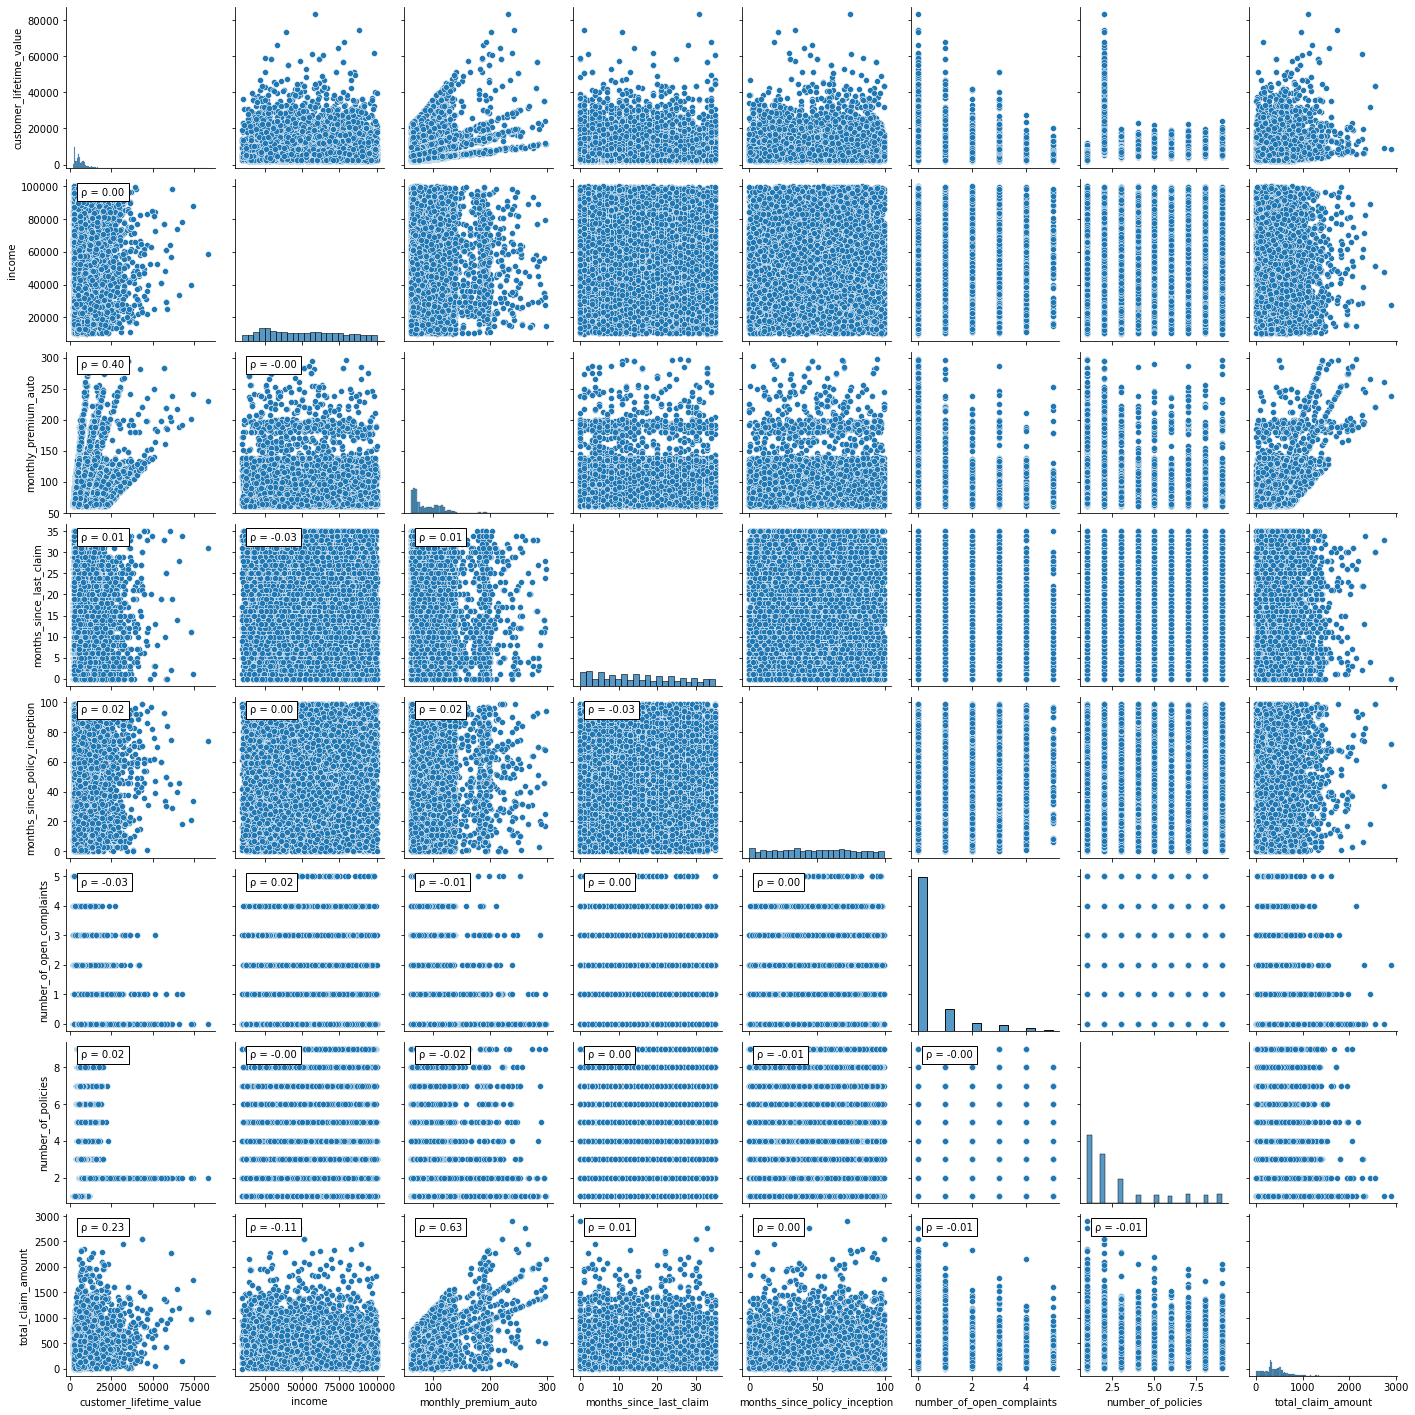

In [30]:
p = sns.pairplot(df_numerical)
p.map_lower(corrfunc)
plt.show()

`Create correlation heatmap to show interaction of every feature with every other feature`
<br>
*Analogous to pairplot*

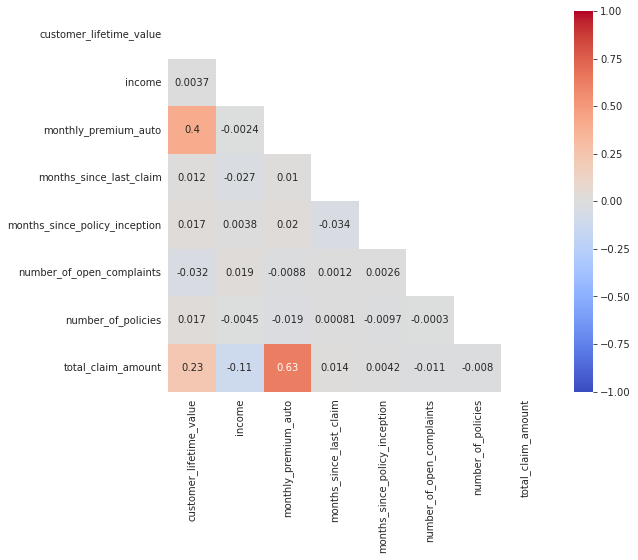

In [30]:
corr = df_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

**`Conclusion of multicollinearity check`**
<br>
- there are no (very) strong correlations
- strongest correlation is *total_claim_amount* vs *monthly_premium_auto* with 0.63
- second, is a week correlation of 0.4 of *monthly_premium_auto* vs *customer_lifetime_value*

### Activity 4 (Thursday)

- Show a plot of the total number of responses. [X]
- Show a plot of the response by the sales channel. [X]
- Show a plot of the response by the total claim amount. [X]
- Show a plot of the response by income. [X]
- (Optional) Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap. [X]
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed. [X]

#### Getting insights from `responses`

In [71]:
df_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


`Plotting total number of` **`responses`**

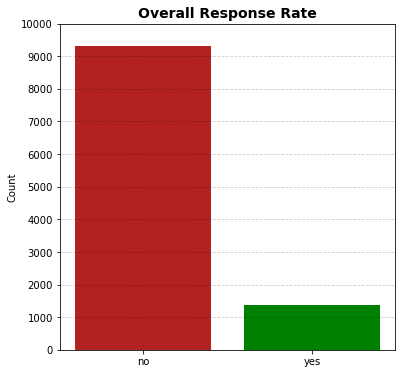

In [76]:
fig, ax = plt.subplots(figsize=(6,6))

x = df_categorical["response"].value_counts().index
y1 = df_categorical["response"].value_counts()

# Overall response rate
ax.bar(x, y1, color=["firebrick", "green"])
ax.grid(ls="--", alpha=0.2, color="k", axis="y")
ax.set_title("Overall Response Rate", weight="bold", size=14)
ax.set_ylabel("Count")
ax.set_yticks(range(0,sum(df_categorical["response"].value_counts()),1000))

plt.show()

**Description**
- 10.689 contacts in total
- 9.316 (87.16 %) yielded no response
- only 1.373 (12.84 %) responded

`Plotting` **`response`** `by` **`sales_channel`**

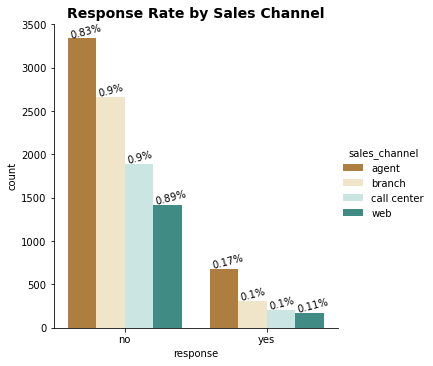

In [217]:
df_responses_by_sales_channel = df_categorical.groupby(["response", "sales_channel"])["response"].count().rename('count').reset_index()

sales_channels = list(df_categorical["sales_channel"].unique())
sales_channel_contacts = list(df_categorical["sales_channel"].value_counts())
sales_channel_responses = list(responses_by_sales_channel[responses_by_sales_channel["response"]=="no"]["count"])
pos_response_rate= [round(((sales_channel_contacts[i]-sales_channel_responses[i])/sales_channel_contacts[i]) ,2)
                    for i in range(len(sales_channels))]
neg_response_rate = [round(1-pos,2) for pos in pos_response_rate]

df_responses_by_sales_channel_calc = pd.DataFrame(
    data=list(zip(sales_channels,sales_channel_contacts,sales_channel_responses, pos_response_rate, neg_response_rate)),
    columns=["sales_channel", "number_of_contacts", "no_of_responses", "pos_response_rate", "neg_response_rate"])

### PLOTTING ###
colors = sns.color_palette("BrBG", 4)
resp_by_channel = sns.catplot(x='response', y = 'count', hue = 'sales_channel', data = df_responses_by_sales_channel, 
                              kind='bar', palette=colors)
plt.title("Response Rate by Sales Channel", weight="bold", size=14)

x_coords = [-0.37, -0.17, 0.03, 0.23, 0.63, 0.83, 1.03, 1.23]
y_cords = [val for val in df_responses_by_sales_channel["count"]]
y_strings = [str(rate) + "%" for rate in (neg_response_rate + pos_response_rate)]

for idx, string in enumerate(y_cords):
    plt.annotate(y_strings[idx], (x_coords[idx]-0.02, y_cords[idx]), rotation=15)

plt.show()

**Description**
- agent: 4.019 contacts       --> 3.340 (83 %) no response / 679 (7 %) responses
- branch: 2.975 contacts      --> 2.665 (90 %) no response / 310 (10 %) responses
- call center: 2.099 contacts --> 1.890 (90 %) no response / 209 (10 %) responses
- web: 1.596 contacts         --> 1.421 (89 5) no response / 175 (11 %) responses 

***`Conclusion`***: Contact via *agent* was the least effective method

`Response Rate by` **`total_claim_amount`**

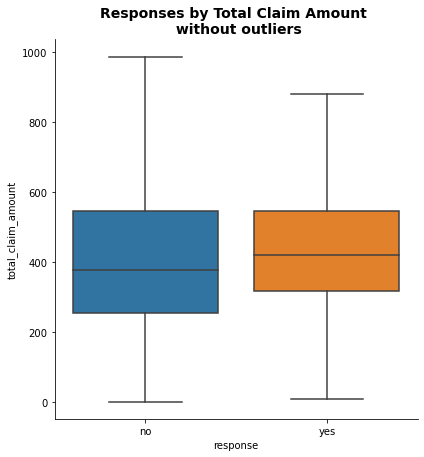

In [230]:
resp_vs_tca = sns.catplot(x="response", y="total_claim_amount", data=df, kind="box", height=6, aspect=1,
                         showfliers=False)
plt.title("Responses by Total Claim Amount \n without outliers", weight="bold", size=14)
plt.show()

**Description**
- total claim amount range is quite similar for no / yes responses
    - median total claim amount for negative response: 376
    - median total claim amount for positive response: 419

***`Conclusion`***: People having an on average slightly higher total claim amount were more likely to answer

`Response Rate by` **`income`**

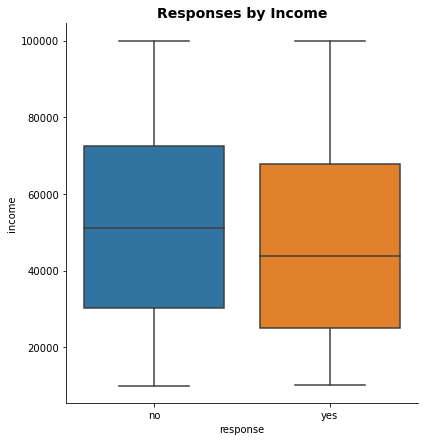

In [221]:
resp_vs_inc = sns.catplot(x="response", y="income", data=df, kind="box", height=6, aspect=1)
plt.title("Responses by Income", weight="bold", size=14)
plt.show()

**Description**
- income range is practically identical for no / yes responses
    - median income for negative response: 51.017
    - median income for positive response: 43.860

***`Conclusion`***: People earning more on average were slightly less likely to answer

`Correlation Heatmap`

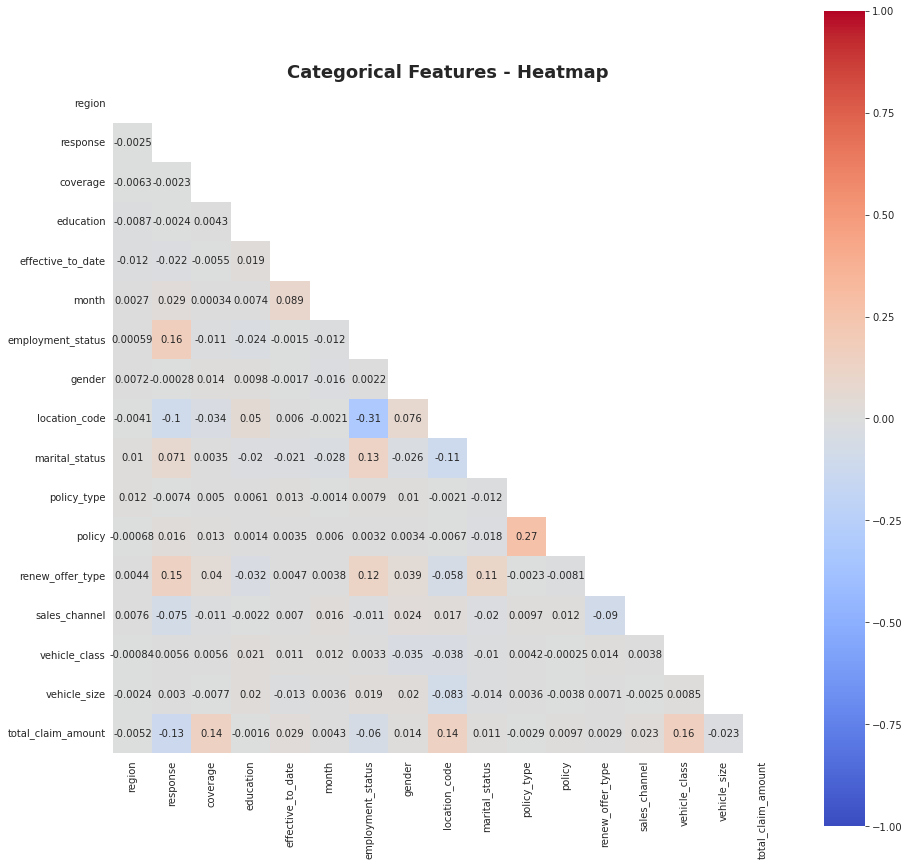

In [223]:
df_categorical_with_tca = df_categorical
df_categorical_with_tca["total_claim_amount"] = df_numerical["total_claim_amount"]
df_categorical_with_tca_ = df_categorical.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

corr = df_categorical_with_tca_
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)
plt.title("Categorical Features - Heatmap", weight="bold", size=18)
plt.show()

**Description**
- no strong correlations observable
- strongest positive correlation: *policy* vs *policy_type* (0.27)
    - correlation less informative, as these two features are quite related
- strongest negative correlation: *location_code* vs *employment_status* (-0.31)
    - here, weak(er) economical chances / performance of given location may reasonably impact a person's chances to find proper employment in that area

In [ ]:
def remove_outliers(df,columns,n_std):
    """
    function for removing outliers from given df;
    select in which column outliers are to be removed;
    specify "outlier condition" by supplying number of standard deviations;
    """
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        std = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*std))]
        df.reset_index(drop=True, inplace=True)
        
    return df